## Семинар 1 "Полносвязные нейронные сети"

ФИО: Кафанов Олег Игоревич

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


In [2]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        self.output_size = output_size
        self.input_size = input_size
        self.w = np.array([np.random.normal(0, 0.1, input_size * output_size)]).reshape((input_size, output_size))
        self.b = np.array([np.zeros(output_size)])
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        self.X = X
        return X.dot(self.w) #+ self.b
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        self.dLdw = dLdy.T.dot(self.X) 
        return self.w.dot(dLdy.T)
        
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        self.w = self.w - learning_rate * self.dLdw.T
        

### Часть 2: Численный градиент

Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [ ]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    #### YOUR CODE HERE
    pass

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

In [ ]:
#### YOUR CODE HERE

### Часть 3: Сигмоида

In [3]:
def S(x):
    return 1 / (1 + np.exp(-x))

In [4]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return S(X)
        
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return dLdy.T * (S(self.X) * (1 - S(self.X))) 
        
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [ ]:
#### YOUR CODE HERE

### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [28]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        self.X = X
        self.y = y
        Xmax = np.max(X,axis=1) # keep axis 0 (different points) intact
        self.loss = - X[range(X.shape[0]),y] + Xmax + np.log( np.sum( np.exp((X.T-Xmax).T),axis=1))
        
        return self.loss
        
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        self.Pk = np.exp(self.X)/np.sum(np.exp(self.X),axis=1).reshape(self.X.shape[0],1).dot(np.ones(1*self.X.shape[1]).reshape(1,self.X.shape[1]))
        self.dLdx = self.Pk
        self.dLdx[range(self.X.shape[0]),self.y] -= 1
        return self.dLdx
        

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [ ]:
#### YOUR CODE HERE

### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [7]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        self.layers = modules
        self.Loss = NLLLoss()
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        for layer in self.layers:
            X = layer.forward(X)
        self.X = X
        return X
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        for layer in reversed(self.layers):
            dLdy = layer.backward(dLdy)
        self.dLdy = dLdy
        return dLdy
    
    def step(self, learning_rate):
        for layer in self.layers:
            layer.step(learning_rate)

### Часть 6, обучение на простых данных

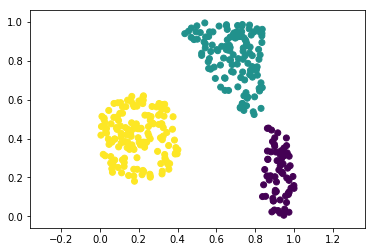

In [8]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.01). 
2. Нарисуйте график сходимости (изменение NLL со временем).
3. Нарисуйте разделяющую поверхность

Отличная визуализация: http://playground.tensorflow.org/

In [16]:
### YOUR CODE HERE:
n_epochs = 2000
learning_rate = 0.01
nn = NeuralNetwork((Linear(2, 10), Sigmoid(), Linear(10, 10), Sigmoid(), Linear(10, 3)))
loss = NLLLoss()

In [17]:
losses = []
for epoch in range(n_epochs):
    p = nn.forward(X)
    loss.forward(nn.X, y)
    losses += [loss.loss.mean()]
    if epoch%100 == 0: 
        print epoch, loss.loss.mean()
    
    nn.backward(loss.backward())
    nn.step(learning_rate)

0 1.06358789141
100 0.818063927753
200 0.228051482199
300 0.0210769534814
400 0.0105803135232
500 0.00704867252241
600 0.00527375992794
700 0.00420309876797
800 0.00348574704687
900 0.00297117619041
1000 0.00258396252956
1100 0.00228207248047
1200 0.00204019004003
1300 0.00184213797708
1400 0.00167708512367
1500 0.00153750095881
1600 0.0014179843329
1700 0.00131455892361
1800 0.00122423164432
1900 0.00114470603398


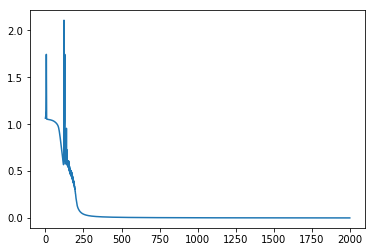

In [18]:
plt.plot(losses)
plt.show()

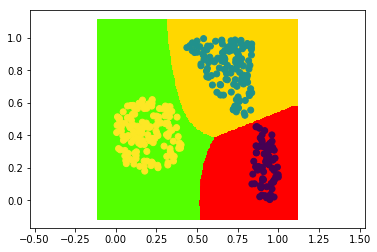

In [25]:
resolution = 250
x_max, y_max = np.max(X,axis=0)
x_min, y_min = np.min(X,axis=0)

x_bg, y_bg = np.meshgrid(np.linspace(x_min - (x_max - x_min)/10, x_max + (x_max - x_min)/10, points),
                         np.linspace(y_min - (y_max - y_min)/10, y_max + (y_max - y_min)/10, points))

X_bg = np.array((x_bg.ravel(), y_bg.ravel())).T

plt.scatter(x_bg, y_bg, c = nn.forward(X_bg).argmax(axis=1).reshape(resolution, resolution), marker=",", cmap="prism")
plt.scatter(X[:,0], X[:,1], c=y)
plt.axis('equal')
plt.show()